In [3]:
%pylab inline
# Pandas is a nice utilitiy that enables some easy data manipulation, especially from a csv
import pandas as pd
# Numpy lets us work with arrays
import numpy as np
# Sklearn provides various modules with a common API
from sklearn import svm, tree, neighbors, neural_network
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Read in our csv files downloaded from Kaggle
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

FileNotFoundError: [Errno 2] File b'train.csv' does not exist: b'train.csv'

In [5]:
# We can use .head() to get just the first few rows of the data.
train_data.head()
# Note how the notebook nicely displays the output for us

NameError: name 'train_data' is not defined

In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_data.columns[train_data.isna().any()].tolist()

['Age', 'Cabin', 'Embarked']

In [6]:
train_data ["SibSp"] = train_data["SibSp"] + train_data["Parch"]
test_data["SibSp"] = test_data["SibSp"] + test_data["Parch"]
train_data ["Child"] = np.where((train_data["Age"] < 14), 1, 0)
test_data ["Child"] = np.where((test_data["Age"] < 14), 1, 0)
#train_data ["Elderly"] = np.where((train_data["Age"] >55 ), 1, 0)
#test_data ["Elderly"] = np.where((test_data["Age"] >55 ), 1, 0)
#train_data ["Baby"] = np.where((train_data["Age"] <5 ), 1, 0)
#test_data ["Baby"] = np.where((test_data["Age"] <5 ), 1, 0)


train_data.drop(columns=['Name', 'Ticket', 'Cabin',  'Fare', 'Embarked', "Parch"], inplace=True)
train_data.set_index(keys=['PassengerId'], drop=True, inplace=True)

test_data.drop(columns=['Name', 'Ticket', 'Cabin', 'Fare', 'Embarked', "Parch"], inplace=True)
test_data.set_index(keys=['PassengerId'], drop=True, inplace=True)
#'Fare': train_data['Fare'].mean(),
#,  'Embarked': train_data['Embarked'].mode()[0]
train_nan_map = {'Age': train_data['Age'].mean()}
test_nan_map = {'Age': test_data['Age'].mean()}

train_data.fillna(value=train_nan_map, inplace=True)
test_data.fillna(value=test_nan_map, inplace=True)
#'Embarked': {'C': 1, 'Q': 2, 'S': 3},
columns_map = { 'Pclass' : {1:5, 3:0},'Sex': {'male': 0, 'female': 1}}
train_data.replace(columns_map, inplace=True)
test_data.replace(columns_map, inplace=True)


train_data ["Demographic"] = train_data["Pclass"] +  train_data["Sex"] * 6
test_data ["Demographic"] = test_data["Pclass"] +  test_data["Sex"] * 6

train_data ["MaleClassOne"] = np.where(((train_data["Pclass"] == 0) & (train_data["Sex"] == 0)), 1, 0)
test_data ["MaleClassOne"] = np.where(((test_data["Pclass"] == 0) & (test_data["Sex"] == 0)), 1, 0)

train_data ["MaleClassTwo"] = np.where(((train_data["Pclass"] == 1) & (train_data["Sex"] == 0)), 1, 0)
test_data ["MaleClassTwo"] = np.where(((test_data["Pclass"] == 1) & (test_data["Sex"] == 0)), 1, 0)

train_data ["MaleClassThree"] = np.where(((train_data["Pclass"] == 2) & (train_data["Sex"] == 0)), 1, 0)
test_data ["MaleClassThree"] = np.where(((test_data["Pclass"] == 2) & (test_data["Sex"] == 0)), 1, 0)

train_data ["FemaleClassOne"] = np.where(((train_data["Pclass"] == 0) & (train_data["Sex"] == 1)), 1, 0)
test_data ["FemaleClassOne"] = np.where(((test_data["Pclass"] == 0) & (test_data["Sex"] == 1)), 1, 0)

train_data ["FemaleClassTwo"] = np.where(((train_data["Pclass"] == 1) & (train_data["Sex"] == 1)), 1, 0)
test_data ["FemaleClassTwo"] = np.where(((test_data["Pclass"] == 1) & (test_data["Sex"] == 1)), 1, 0)

train_data ["FemaleClassThree"] = np.where(((train_data["Pclass"] == 2) & (train_data["Sex"] == 1)), 1, 0)
test_data ["FemaleClassThree"] = np.where(((test_data["Pclass"] == 2) & (test_data["Sex"] == 1)), 1, 0)



X_train = train_data.loc[:, train_data.columns != 'Survived']
y_train = train_data.loc[:, 'Survived']

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=10)

print(X_train.head())
print(y_train.head())
print(test_data.head())

             Pclass  Sex   Age  SibSp  Child  Demographic
PassengerId                                              
8                 0    0   2.0      4      1            0
766               5    1  51.0      1      0           11
340               5    0  45.0      0      0            5
375               0    1   3.0      4      1            6
184               2    0   1.0      3      1            2
PassengerId
8      0
766    1
340    0
375    0
184    1
Name: Survived, dtype: int64
             Pclass  Sex   Age  SibSp  Child  Demographic
PassengerId                                              
892               0    0  34.5      0      0            0
893               0    1  47.0      1      0            6
894               2    0  62.0      0      0            2
895               0    0  27.0      0      0            0
896               0    1  22.0      2      0            6


In [7]:
train_data.columns[train_data.isna().any()].tolist()
#train_data[train_data['Embarked'].isna() == True]
#train_data['Embarked']
#test_data.columns[test_data.isna().any()].tolist()
xlist = []
ylist = []

In [8]:
gnb = GaussianNB()
gnb.fit(X_train.values, y_train.values)
print(gnb.score(X_test.values, y_test.values))
y_pred = gnb.predict(X_test.values)
y_truth = y_test.values
tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
xlist.append(fp/(fp + tp))
ylist.append(fn/(fn + tn))
print(xlist)
print(ylist)

0.7910447761194029
[0.3442622950819672]
[0.0958904109589041]


In [9]:
tree_clf = tree.DecisionTreeClassifier()
tree_clf.fit(X_train.values, y_train.values)
print(tree_clf.score(X_test.values, y_test.values))

y_pred = tree_clf.predict(X_test.values)
y_truth = y_test.values
tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
#xlist.append(fp/(fp + tp))
#ylist.append(fn/(fn + tn))
print(xlist)
print(ylist)

0.832089552238806
[0.3442622950819672]
[0.0958904109589041]


In [10]:
knn_clf = neighbors.KNeighborsClassifier()
knn_clf.fit(X_train.values, y_train.values)
print(knn_clf.score(X_test.values, y_test.values))
y_pred = knn_clf.predict(X_test.values)
y_truth = y_test.values
tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
xlist.append(fp/(fp + tp))
ylist.append(fn/(fn + tn))
print(xlist)
print(ylist)

0.8246268656716418
[0.3442622950819672, 0.25263157894736843]
[0.0958904109589041, 0.1329479768786127]


In [11]:
NN_clf = neural_network.MLPClassifier()
NN_clf.fit(X_train.values, y_train.values)
print(NN_clf.score(X_test.values, y_test.values))
y_pred = NN_clf.predict(X_test.values)
y_truth = y_test.values
tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
xlist.append(fp/(fp + tp))
ylist.append(fn/(fn + tn))
print(xlist)
print(ylist)

0.8432835820895522
[0.3442622950819672, 0.25263157894736843, 0.19767441860465115]
[0.0958904109589041, 0.1329479768786127, 0.13736263736263737]


In [12]:
RF_clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF_clf.fit(X_train.values, y_train.values)
print(RF_clf.score(X_test.values, y_test.values))
y_pred = RF_clf.predict(X_test.values)
y_truth = y_test.values
tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
#xlist.append(fp/(fp + tp))
#ylist.append(fn/(fn + tn))
print(xlist)
print(ylist)

0.8097014925373134
[0.3442622950819672, 0.25263157894736843, 0.19767441860465115]
[0.0958904109589041, 0.1329479768786127, 0.13736263736263737]


In [13]:
# LR_clf = LinearRegression()
# LR_clf.fit(X_train.values, y_train.values)
# print(LR_clf.score(X_test.values, y_test.values))
# y_pred = LR_clf.predict(X_test.values)
# y_truth = y_test.values
# tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
# xlist.append(fp/(fp + tp))
# ylist.append(fn/(fn + tn))

In [14]:
svm_clf = svm.SVC(kernel='linear')
svm_clf.fit(X_train.values, y_train.values)
print(svm_clf.score(X_test.values, y_test.values))
y_pred = svm_clf.predict(X_test.values)
y_truth = y_test.values
tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
#xlist.append(fp/(fp + tp))
#ylist.append(fn/(fn + tn))
print(xlist)
print(ylist)

0.8059701492537313
[0.3442622950819672, 0.25263157894736843, 0.19767441860465115]
[0.0958904109589041, 0.1329479768786127, 0.13736263736263737]


In [15]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=5)
mlp_clf.fit(X_train.values, y_train.values)
print(mlp_clf.score(X_test.values, y_test.values))
y_pred = mlp_clf.predict(X_test.values)
y_truth = y_test.values
tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
xlist.append(fp/(fp + tp))
ylist.append(fn/(fn + tn))
print(xlist)
print(ylist)

0.8432835820895522
[0.3442622950819672, 0.25263157894736843, 0.19767441860465115, 0.19767441860465115]
[0.0958904109589041, 0.1329479768786127, 0.13736263736263737, 0.13736263736263737]


In [16]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=10)
sgd_clf.fit(X_train.values, y_train.values)
print(sgd_clf.score(X_test.values, y_test.values))
y_pred = sgd_clf.predict(X_test.values)
y_truth = y_test.values
tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
xlist.append(fp/(fp + tp))
ylist.append(fn/(fn + tn))
print(xlist)
print(ylist)   

0.3656716417910448
[0.3442622950819672, 0.25263157894736843, 0.19767441860465115, 0.19767441860465115, 0.6507936507936508]
[0.0958904109589041, 0.1329479768786127, 0.13736263736263737, 0.13736263736263737, 0.375]


/Users/brandonsu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [17]:
tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
print("Confusion Matrix")
print(confusion_matrix(y_truth, y_pred, labels=[0, 1]))
print("")
print("True Negatives", tn)
print("False Positives", fp)
print("False Negatives", fn)
print("True Positives", tp)

Confusion Matrix
[[ 10 164]
 [  6  88]]

True Negatives 10
False Positives 164
False Negatives 6
True Positives 88


In [18]:
y_pred_tree = mlp_clf.predict(X_test.values)
y_truth_tree = y_test.values

Confusion matrix, without normalization
[[ 10 164]
 [  6  88]]


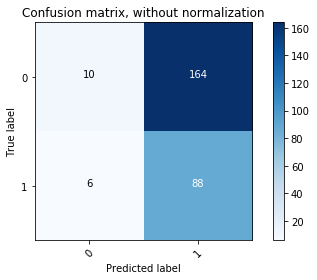

In [19]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_truth, y_pred)
class_names=['0', '1']
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()

In [20]:
predictions = knn_clf.predict(test_data.values)

In [21]:
type(predictions)

numpy.ndarray

In [22]:
pred_df = pd.DataFrame(predictions, index=test_data.index, columns=['Survived'])
type(pred_df)

pandas.core.frame.DataFrame

In [23]:
pred_df.to_csv('predictions.csv', header=True, sep=',')

In [24]:
print(xlist)
print(ylist)

[0.3442622950819672, 0.25263157894736843, 0.19767441860465115, 0.19767441860465115, 0.6507936507936508]
[0.0958904109589041, 0.1329479768786127, 0.13736263736263737, 0.13736263736263737, 0.375]


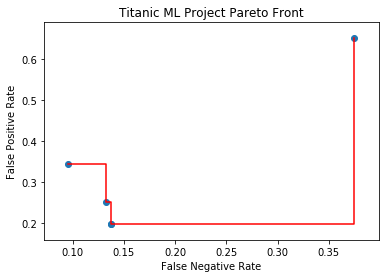

In [25]:
# index = xlist.index(min(xlist))
# xlist.remove(min(xlist))
# print(xlist)
# print(ylist)
# del ylist[index]
plt.scatter(ylist, xlist)
plt.plot(ylist, xlist, color='r', drawstyle='steps-post')
plt.xlabel("False Negative Rate")
plt.ylabel("False Positive Rate")
plt.title("Titanic ML Project Pareto Front")
plt.show()